In [5]:
from autogluon.tabular import TabularDataset, TabularPredictor
import numpy as np
import math

In [6]:
train_data = TabularDataset(f'Data/phil_socdata_train.csv')
train_data.head()

Loaded data from: Data/phil_socdata_train.csv | Columns = 4 / 4 | Rows = 427326 -> 427326


,SOC,V,I,T
0,100.000031,400.75,0.000000,15.5
1,100.000031,400.75,-0.270000,15.5
2,100.000031,400.75,-0.539999,15.5
3,100.000031,400.75,-0.809999,15.5
4,100.000031,400.75,-1.079998,15.5


In [7]:
label = 'SOC'
train_data[label].describe()

count    427326.000000
mean         67.759531
std          24.669208
min           0.000000
25%          48.627468
50%          72.941200
75%          88.627480
max         100.000031
Name: SOC, dtype: float64

In [11]:
predictor = TabularPredictor(label=label,eval_metric='root_mean_squared_error').fit(train_data, presets='best_quality',time_limit = 30)

'''
import autogluon.core as ag

nn_options = {  # specifies non-default hyperparameter values for neural network models
    'num_epochs': 10,  # number of training epochs (controls training time of NN models)
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)
}

gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 100,  # number of boosting rounds (controls training time of GBM models)
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
}

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN_TORCH': nn_options,  # NOTE: comment this line out if you get errors on Mac OSX
                  }  # When these keys are missing from hyperparameters dict, no models of that type are trained

time_limit = 30*60  # train various models for ~10 min
num_trials = 50  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto'  # to tune hyperparameters using random search routine with a local scheduler

hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

predictor = TabularPredictor(label=label, eval_metric='root_mean_squared_error').fit(
    train_data, time_limit=time_limit, auto_stack=True, presets='best_quality',
    hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
)
'''


No path specified. Models will be saved in: "AutogluonModels\ag-20230328_044239\"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 30s
AutoGluon will save models to "AutogluonModels\ag-20230328_044239\"
AutoGluon Version:  0.7.0
Python Version:     3.10.10
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
Train Data Rows:    427326
Train Data Columns: 3
Label Column: SOC
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (100.000030517578, 0.0, 67.75953, 24.66921)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Gener

"\nimport autogluon.core as ag\n\nnn_options = {  # specifies non-default hyperparameter values for neural network models\n    'num_epochs': 10,  # number of training epochs (controls training time of NN models)\n    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)\n    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)\n    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)\n}\n\ngbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees\n    'num_boost_round': 100,  # number of boosting rounds (controls training time of GBM models)\n    'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)\n}\n\nhyperparameters = {  # hyperparameter

In [12]:
test_data = TabularDataset(f'Data/phil_socdata_test.csv')

y_pred = predictor.predict(test_data.drop(columns=[label]))
y_pred.head()

Loaded data from: Data/phil_socdata_test.csv | Columns = 4 / 4 | Rows = 18307 -> 18307


0    99.372314
1    99.372314
2    99.372314
3    99.372314
4    99.372314
Name: SOC, dtype: float32

In [13]:
predictor.evaluate(test_data, silent=True)

c:\Users\kwitv\Documents\MARC\SOCprediction\venv\lib\site-packages\autogluon\tabular\predictor\predictor.py:1420: FutureWarning: Calling `predictor.predict_proba` when problem_type=regression will raise an AssertionError starting in AutoGluon v0.8. Please call `predictor.predict` instead.
  warnings.warn(


{'root_mean_squared_error': -2.5797527740671113,
 'mean_squared_error': -6.655124375306956,
 'mean_absolute_error': -1.835941397100358,
 'r2': 0.9897077453894739,
 'pearsonr': 0.9950794622603192,
 'median_absolute_error': -1.1925811769336008}

In [14]:
predictor.leaderboard(test_data, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT_BAG_L1,-2.579753,-2.691959,0.660290,12.774895,166.930367,0.660290,12.774895,166.930367,1,True,1
1,WeightedEnsemble_L2,-2.579753,-2.691959,0.662285,12.800825,166.997701,0.001996,0.025931,0.067335,2,True,2


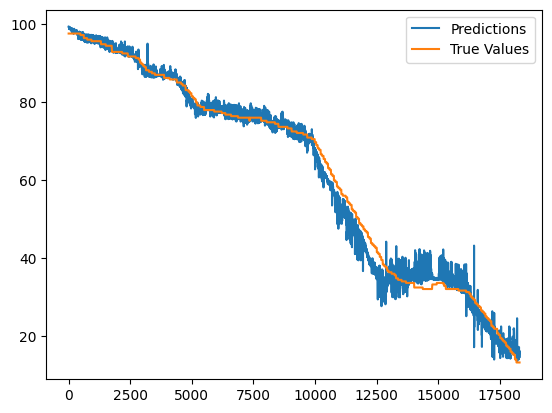

In [15]:
#plots the predicted vs actual values of the top performing model using matplotlib
import matplotlib.pyplot as plt
plt.plot(y_pred, label="Predictions")
plt.plot(test_data[label], label="True Values")
plt.legend()
plt.show()

In [16]:
mse_test = np.mean(((y_pred - test_data[label])**2))
rmse_test = math.sqrt(mse_test)
print("test data rmse", rmse_test)

test data rmse 2.5797527740671113
